In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
origin_data = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
origin_data.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
#origin_data.info()

In [4]:
display(origin_data)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# 전처리

In [5]:
# feature, label 로 나누기

label = origin_data.iloc[:, -1]
display(label)

features = origin_data.iloc[:,:-1]
display(features)

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name:  Label, Length: 225745, dtype: object

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


## 1. 문자열 바꿔주기

In [6]:
#특이사항 변경 - "Infinity" 제거하기(또는 예외처리).
features.replace('Infinity', 99999999, inplace=True) #-1도 가능


pd.value_counts(features[" Flow Packets/s"].values, sort=False)

0.567604308            1
1.8141856619999999     1
2.163553385            1
0.17080953399999999    1
4.270705045            1
                      ..
67.24045186            1
0.160207215            1
6.869972038999999      1
0.510234035            1
0.16311777800000002    1
Length: 196730, dtype: int64

In [7]:
#label을 0과 1로 바꾸기

label.replace(['BENIGN','DDoS'], [0,1], inplace=True) #inplace 해줘야 반영됨
display(label)

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name:  Label, Length: 225745, dtype: int64

## 2. 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

def labeling(target):
    encoder = LabelEncoder()
    encoder.fit(target)
    label = encoder.transform(target)
    return label

In [9]:

flow_id = features["Flow ID"]
src_ip = features[" Source IP"]
dst_ip = features[" Destination IP"]
timestamp = features[" Timestamp"]


features["Flow ID"] = labeling(flow_id)
features[" Source IP"] = labeling(src_ip)
features[" Destination IP"] = labeling(dst_ip)
features[" Timestamp"] = labeling(timestamp)


## 3. NaN 값 처리

In [10]:
col_mask=features.isnull().any(axis=0) 

In [11]:
row_mask=features.isnull().any(axis=1)

In [12]:
display(features.loc[row_mask,col_mask])

,Flow Bytes/s
6796,NaN
14739,NaN
15047,NaN
209728,NaN


### 결손값 처리.


In [13]:
#features.columns

In [14]:
features.fillna(0, inplace=True) #결손값 처리

In [15]:
display(features.loc[row_mask,col_mask])

,Flow Bytes/s
6796,0
14739,0
15047,0
209728,0


## Train & Test Set Split

In [16]:
display(features)
print(features.columns)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,82985,22,443,866,54865,6,0,3,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,83017,37,80,866,55054,6,0,109,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,83018,37,80,866,55055,6,0,52,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,57106,45,443,860,46236,6,0,34,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,83023,49,443,866,54863,6,0,3,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,56764,1925,80,859,61374,6,92,61,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,56768,1925,80,859,61378,6,92,72,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,56765,1925,80,859,61375,6,92,75,1,1,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,56856,1983,80,859,61323,6,92,48,2,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

### 모델 훈련

# A. 결정트리

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = features[['Flow ID',' Source IP',' Source Port',' Destination IP',' Destination Port',' Protocol',' Timestamp',' Flow Duration']]

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.8, random_state=2020)

clf = DecisionTreeClassifier(max_depth=5,random_state=1886) #이거 의미 모르겠다...

clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=1886)

In [18]:
#예측값 -> 따로 출력하기.
import sys
np.set_printoptions(threshold=sys.maxsize)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

### 예측값 출력

In [20]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)

print("train data\n")
display(pd.concat([pd.DataFrame(train_pred, columns=['train_pred']), pd.DataFrame(y_train.tolist(), columns=['y_train'])], axis=1))

print("test data\n")
df1 = pd.concat([pd.DataFrame(test_pred, columns=['test_pred']), pd.DataFrame(y_test.tolist(), columns=['y_test'])], axis=1)
display(df1)

df1.to_csv("DT_pred.csv")

train data



,train_pred,y_train
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
45144,0,0
45145,1,1
45146,1,1
45147,1,1


test data



,test_pred,y_test
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
180591,0,0
180592,0,0
180593,1,1
180594,0,0


[Text(1004.4000000000001, 906.0, 'X[1] <= 427.5\ngini = 0.492\nsamples = 45149\nvalue = [19692, 25457]'),
 Text(669.6, 543.6, 'X[4] <= 4080.0\ngini = 0.024\nsamples = 25766\nvalue = [309, 25457]'),
 Text(334.8, 181.19999999999993, 'gini = 0.0\nsamples = 25457\nvalue = [0, 25457]'),
 Text(1004.4000000000001, 181.19999999999993, 'gini = 0.0\nsamples = 309\nvalue = [309, 0]'),
 Text(1339.2, 543.6, 'gini = 0.0\nsamples = 19383\nvalue = [19383, 0]')]

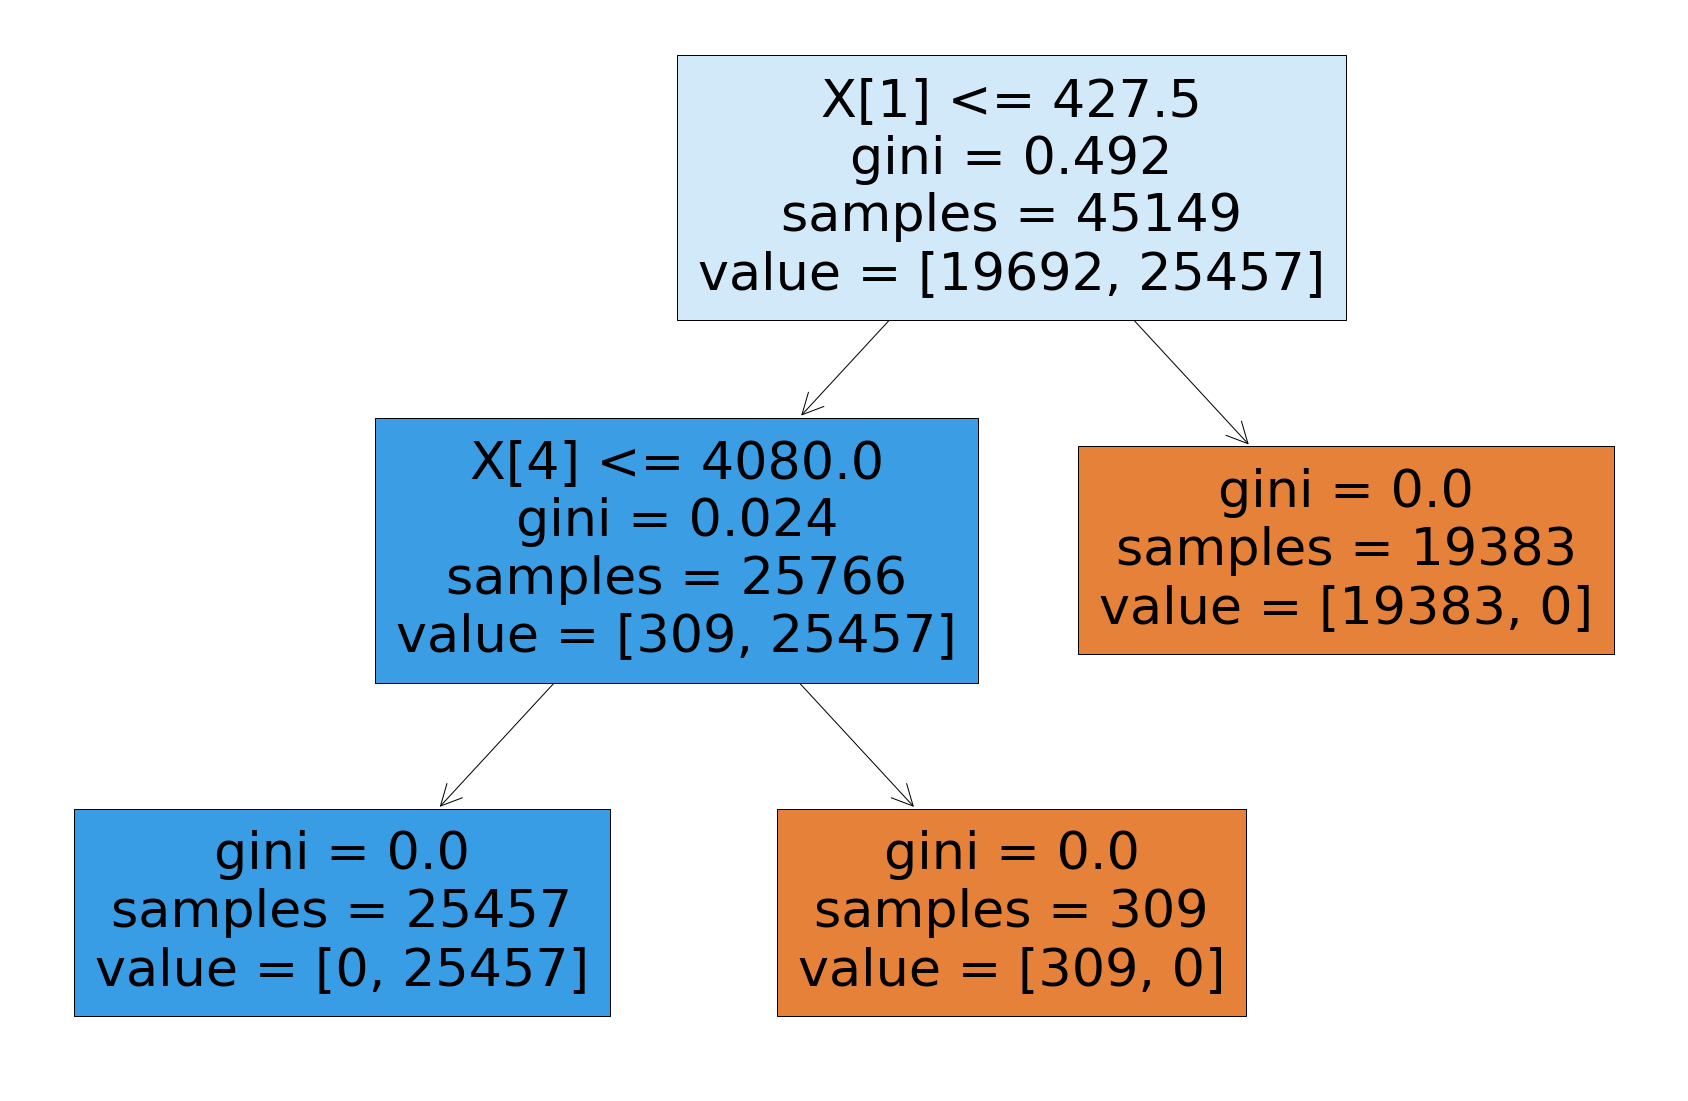

In [21]:
#결정트리 모델 설정 -> 예측값, 실제값 출력

fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(clf, filled=True)

### 성능평가

In [22]:

print("훈련 세트 정확도 : {}".format(accuracy_score(train_pred, y_train)))
print("테스트 세트 정확도: {}".format(accuracy_score(test_pred, y_test)))

훈련 세트 정확도 : 1.0
테스트 세트 정확도: 0.9999446277879909


In [23]:
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred, target_names=['BENIGN', 'DDoS']))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     78026
        DDoS       1.00      1.00      1.00    102570

    accuracy                           1.00    180596
   macro avg       1.00      1.00      1.00    180596
weighted avg       1.00      1.00      1.00    180596



In [25]:
# 그냥 해본 특성 중요도
for name, importance in zip(X.columns, clf.feature_importances_):
    print(name, importance)

Flow ID 0.0
 Source IP 0.9725039831364671
 Source Port 0.0
 Destination IP 0.0
 Destination Port 0.027496016863532882
 Protocol 0.0
 Timestamp 0.0
 Flow Duration 0.0


In [26]:
def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)


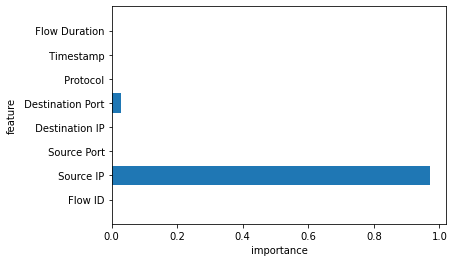

In [27]:
plot_feature_importances(clf)

## 교차검증

In [28]:
from sklearn.model_selection import KFold, cross_val_score

#seed 는 아무거나~^^
seed=1771

#fold 수는 20으로 함.
kfold = KFold(n_splits=20, shuffle=True, random_state=seed)
results = cross_val_score(clf, features, label, cv=kfold)

print(results)

[1.         0.99991141 0.99991141 0.99982282 0.99991141 0.9999114
 1.         1.         1.         1.         1.         0.9999114
 1.         1.         1.         0.9999114  1.         1.
 1.         1.        ]


## 앙상블

In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

baggingclf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10, random_state=0)
baggingclf.fit(X, label)
bagging_pred = baggingclf.predict(X_test)


In [30]:
print("테스트 세트 정확도: {}".format(accuracy_score(bagging_pred, y_test)))

테스트 세트 정확도: 0.9999889255575982


## 앙상블 -> 배깅방법으로 -> 결국 랜덤포레스트!

# B. 랜덤포레스트

In [31]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_pred_y = rnd_clf.predict(X_test)

accuracy_score(y_test, rnd_pred_y)

0.9999833883363972

In [33]:
print("test data\n")
df2 = pd.concat([pd.DataFrame(rnd_pred_y, columns=['test_pred']), pd.DataFrame(y_test.tolist(), columns=['y_test'])], axis=1)
display(df2)
df2.to_csv("RF_predictions.csv")

test data



,test_pred,y_test
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
180591,0,0
180592,0,0
180593,1,1
180594,0,0


## 성능평가

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rnd_pred_y, target_names=['BENIGN', 'DDoS']))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     78026
        DDoS       1.00      1.00      1.00    102570

    accuracy                           1.00    180596
   macro avg       1.00      1.00      1.00    180596
weighted avg       1.00      1.00      1.00    180596



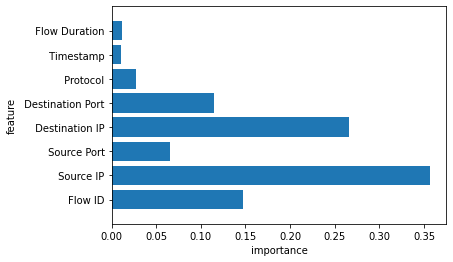

In [35]:
plot_feature_importances(rnd_clf)

In [36]:
for name, importance in zip(X.columns, rnd_clf.feature_importances_):
    print(name, importance)

Flow ID 0.14708352753191928
 Source IP 0.3571433856451574
 Source Port 0.06494134139322323
 Destination IP 0.2660245310981294
 Destination Port 0.11475481380816414
 Protocol 0.027449623147254347
 Timestamp 0.011098585868989786
 Flow Duration 0.011504191507162368


## 교차검증

In [37]:
#seed 는 아무거나~^^
seed=1771

#fold 수는 20으로 함.
kfold = KFold(n_splits=20, shuffle=True, random_state=seed)
results = cross_val_score(rnd_clf, features, label, cv=kfold)

print(results)

[1.         0.99982282 1.         0.99991141 0.99964564 0.9998228
 1.         0.9999114  1.         0.9999114  1.         1.
 1.         1.         1.         0.99964561 0.9999114  1.
 0.99973421 0.9999114 ]


### 이따 다시 돌려봐야지~